In [1]:
import pandas as pd
import  numpy as np 
import networkx as nx 
import seaborn as sns
from tqdm.notebook import tqdm
import netwulf
from networkx.readwrite import json_graph
import json
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [31]:
reviews = pd.read_csv('rotten_tomatoes_critic_reviews.csv')
movies = pd.read_csv('rotten_tomatoes_movies.csv')

In [32]:
movies.columns

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'],
      dtype='object')

In [33]:
movies['original_release_date'] = pd.to_datetime(movies['original_release_date'])

In [34]:
movies.tail(5)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
17707,m/zoot_suit,Zoot Suit,Mexican-American gangster Henry Reyna (Daniel ...,NaN,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,...,MCA Universal Home Video,Rotten,56.0,9.0,Upright,74.0,1195.0,2,5,4
17708,m/zootopia,Zootopia,From the largest elephant to the smallest shre...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","J.K. Simmons, Kristen Bell, Octavia Spencer, A...",2016-03-04,...,Walt Disney Animation Studios,Certified-Fresh,98.0,291.0,Upright,92.0,101511.0,50,285,7
17709,m/zorba_the_greek,Zorba the Greek,Traveling to inspect an abandoned mine his fat...,NaN,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1964-12-17,...,Fox,Fresh,80.0,10.0,Upright,86.0,7146.0,0,8,2
17710,m/zulu,Zulu,"In 1879, the Zulu nation hands colonial Britis...",Zulu patiently establishes a cast of colorful ...,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,...,Paramount Pictures,Fresh,96.0,23.0,Upright,91.0,30193.0,6,22,1
17711,m/zulu_dawn,Zulu Dawn,Sir Henry Bartle Frere's (John Mills) vastly o...,NaN,PG,"Action & Adventure, Art House & International,...",Douglas Hickox,"Cy Endfield, Anthony Storey","Burt Lancaster, Peter O'Toole, Simon Ward, Joh...",1979-12-14,...,Tango Entertainment,Rotten,50.0,8.0,Upright,62.0,4469.0,0,4,4


In [38]:
ds = f'Total number of movies: {len(movies)}\nTotal number of reviews: {len(reviews)}'
print(ds)

Total number of movies: 17712
Total number of reviews: 1130017


In [39]:
movies['actors'] = movies['actors'].apply(lambda x: str(x).split(','))

In [40]:
movies.columns

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'],
      dtype='object')

### Create a new variable called gender
This will ad a list of the genders for the actors, the genders are in the same order as the actors. We will utilize the gender guesser api to do this.  

In [41]:
import gender_guesser.detector as gender
d = gender.Detector()

In [42]:
d.get_gender('David')

'male'

In [43]:
movies.loc[0]

rotten_tomatoes_link                                                        m/0814255
movie_title                         Percy Jackson & the Olympians: The Lightning T...
movie_info                          Always trouble-prone, the life of teenager Per...
critics_consensus                   Though it may seem like just another Harry Pot...
content_rating                                                                     PG
genres                              Action & Adventure, Comedy, Drama, Science Fic...
directors                                                              Chris Columbus
authors                                    Craig Titley, Chris Columbus, Rick Riordan
actors                              [Logan Lerman,  Brandon T. Jackson,  Alexandra...
original_release_date                                             2010-02-12 00:00:00
streaming_release_date                                                     2015-11-25
runtime                                               

In [44]:
pd.options.mode.chained_assignment = None
movies['actor_genders'] = ' '
for idx,row in movies.iterrows():
    
    genders = []
    for actor in row['actors']:
        if actor == '' or actor == ' ':
            continue
        actor = actor.split(' ')
        if actor[0] == ' ' or actor[0] == '':
            actor_first_name = actor[1] 
        else: 
            actor_first_name = actor[0]
        gender = d.get_gender(actor_first_name)
        genders.append(gender)
    
    movies.iloc[idx,-1] = ','.join(genders)
movies['actor_genders'] = movies['actor_genders'].apply(lambda x: x.split(','))

In [45]:
movies['actor_genders'] 

0        [mostly_male, male, female, male, male, male, ...
1        [female, female, male, female, female, female,...
2        [male, male, female, male, mostly_female, most...
3        [male, male, mostly_male, unknown, male, male,...
4        [male, male, male, male, male, male, male, mal...
                               ...                        
17707    [male, male, male, unknown, male, male, male, ...
17708    [unknown, female, female, male, female, male, ...
17709    [male, male, female, female, male, female, unk...
17710    [male, male, female, male, male, male, male, m...
17711    [male, male, male, male, male, male, male, unk...
Name: actor_genders, Length: 17712, dtype: object

### Crate variable called male and female count 

In [46]:
movies['male_count'] = movies['actor_genders'].apply(lambda x: sum([1 if g == 'male' or g == 'mostly_male' else 0 for g in x]))
movies['female_count'] = movies['actor_genders'].apply(lambda x: sum([1 if g == 'female' or g == 'mostly_female' else 0 for g in x]))

<Axes: xlabel='female_count', ylabel='tomatometer_rotten_critics_count'>

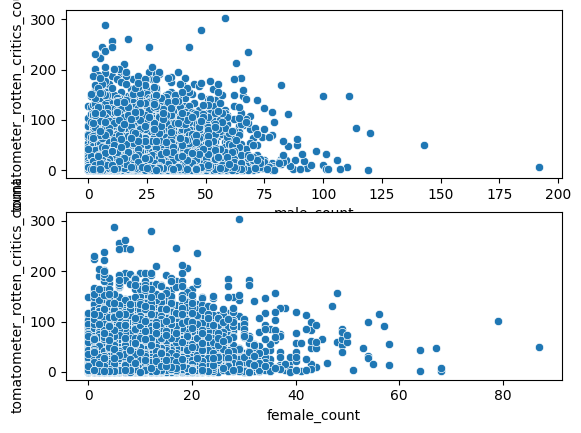

In [47]:
fig,ax = plt.subplots(2,1)
sns.scatterplot(data = movies,x='male_count',y = 'tomatometer_rotten_critics_count',ax = ax[0])
sns.scatterplot(data = movies,x='female_count',y = 'tomatometer_rotten_critics_count',ax = ax[1])

### Constructing the graph
Here we will construct the graph, with each node being a movie connected by the actors. The movies will be indexed by the unique rotten tomatoes link, since some movies contains remakes, of old movies and thus they still have the same title.

The weighted edgelist is created such, that the weights of the edges are equal to the size of the set of the actors shared by two movies. 

In [56]:
def get_weighted_edge_list(movies_df):
    '''
    movies: A pandas dataframe containing the movie data-set from rotten tomatoes
    return: returns a weighted edgelist to which can be read by networkx, each edge is
    represented as: (Movie1,Movie2,weight) where the weight indicates how many actors appear
    in both movies. 
    '''
    # convert the list of actors for each movie into a set
    movies_df['actors_set'] = movies_df['actors'].apply(set)
    
    # create an empty DataFrame to store the edge list
    edge_list = []#pd.DataFrame(columns=['movie1', 'movie2', 'weight'])
    actors = {}
    # compare each pair of movies in the DataFrame
    for i in tqdm(range(len(movies_df))):
        for j in range(i + 1, len(movies_df)):
            # find the actors that are shared between the two movies
            shared_actors = movies_df.loc[i, 'actors_set'].intersection(movies_df.loc[j, 'actors_set'])
            if shared_actors:
                # create an edge between the two movies and set the weight to the number of shared actors
                #edge_list.append()
                edge_list.append((
                    movies_df.loc[i, 'rotten_tomatoes_link'],
                    movies_df.loc[j, 'rotten_tomatoes_link'],
                    len(shared_actors)
                ))
                actors[(movies_df.loc[i, 'rotten_tomatoes_link'],
                        movies_df.loc[j, 'rotten_tomatoes_link'])] = shared_actors
                
    return edge_list,actors

In [57]:
weighted_edge_list,actors = get_weighted_edge_list(movies)

  0%|          | 0/17712 [00:00<?, ?it/s]

In [58]:
G = nx.Graph()
G.add_weighted_edges_from(weighted_edge_list)

In [59]:
G.nodes

NodeView(('m/0814255', 'm/10004352-going_the_distance', 'm/10008849-married_life', 'm/10011582-TRON_legacy', 'm/10011815-hole', 'm/10012039-lottery_ticket', 'm/10012063-ghost_writer', 'm/10012150-high_school', 'm/1005199-dangerous_liaisons', 'm/1017641-risky_business', 'm/1018009-running_scared', 'm/1019743-squeeze', 'm/1028561-where_the_heart_is', 'm/1034067-switch', 'm/1034131-field', 'm/1037177-deceived', 'm/1045706-calendar_girl', 'm/1046129-fugitive', 'm/1062483-bad_boys', 'm/1066712-to_die_for', 'm/1076620-anna_karenina', 'm/1077027-batman_and_robin', 'm/1083326-les_miserables', 'm/1083436-1083436-out_of_sight', 'm/1083461-avengers', 'm/1083659-rounders', 'm/1097242-screwed', 'm/10_years', 'm/1110008-sidewalks_of_new_york', 'm/1110048-pornographer', 'm/1118700-adaptation', 'm/1119037-nicholas_nickleby', 'm/1123000-carrie', 'm/1126175-house_of_the_dead', 'm/1127652-big_empty', 'm/1133964-king_arthur', 'm/1151898-capote', 'm/1152276-rent', 'm/1154157-big_mommas_house_2', 'm/1156283

In [60]:
actors

{('m/0814255', 'm/10004352-going_the_distance'): {' Christie Laing'},
 ('m/0814255', 'm/10008849-married_life'): {' Suzanne Ristic'},
 ('m/0814255', 'm/10011582-TRON_legacy'): {' Conrad Coates', ' Serinda Swan'},
 ('m/0814255', 'm/10011815-hole'): {' Merritt Patterson'},
 ('m/0814255', 'm/10012039-lottery_ticket'): {' Brandon T. Jackson'},
 ('m/0814255', 'm/10012063-ghost_writer'): {' Pierce Brosnan'},
 ('m/0814255', 'm/10012150-high_school'): {' Max Van Ville'},
 ('m/0814255', 'm/1005199-dangerous_liaisons'): {' Uma Thurman'},
 ('m/0814255', 'm/1017641-risky_business'): {' Joe Pantoliano'},
 ('m/0814255', 'm/1018009-running_scared'): {' Joe Pantoliano'},
 ('m/0814255', 'm/1019743-squeeze'): {' Joe Pantoliano'},
 ('m/0814255', 'm/1028561-where_the_heart_is'): {' Uma Thurman'},
 ('m/0814255', 'm/1034067-switch'): {' Catherine Keener'},
 ('m/0814255', 'm/1034131-field'): {' Sean Bean'},
 ('m/0814255', 'm/1037177-deceived'): {' Conrad Coates'},
 ('m/0814255', 'm/1045706-calendar_girl'): {

#### Add the actors set as attributes to each edge
As an edge attribute the set of shared actos are addded. This can prove usefull if the graph is to be inverted to the bigraph. 

In [61]:
for mov1,mov2 in G.edges:
    try:
        G[mov1][mov2]['Actors'] = list(actors[(mov1,mov2)])
    except:
        G[mov1][mov2]['Actors'] = list(actors[(mov2,mov1)])

In [62]:
data = json_graph.node_link_data(G)
# save the data to a JSON file
with open('graph_tomato_link.json', 'w') as f:
    json.dump(data, f)

### Load the graph in from a json file 

In [228]:
with open('graph_tomato_link.json', 'r') as f:
    data = json.load(f)

G = json_graph.node_link_graph(data)
len(G)

17018

#### Find giant connected component and use that

In [182]:
#movies.reset_index()
#movies = movies.set_index('rotten_tomatoes_link')

In [183]:
movies.head(3)

,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,...,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,actor_genders,male_count,female_count,actors_set
rotten_tomatoes_link,,,,,,,,,,,,,,,,,,,,,
m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","[Logan Lerman, Brandon T. Jackson, Alexandra...",2010-02-12,2015-11-25,...,Spilled,53.0,254421.0,43,73,76,"[mostly_male, male, female, male, male, male, ...",42,37,"{ Melina Kanakaredes, Ray Winstone, Marielle..."
m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"[Catherine Keener, Amanda Peet, Oliver Platt...",2010-04-30,2012-09-04,...,Upright,64.0,11574.0,44,123,19,"[female, female, male, female, female, female,...",2,6,"{ Rebecca Hall, Kevin Corrigan, Amanda Peet,..."
m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"[Dudley Moore, Bo Derek, Julie Andrews, Rob...",1979-10-05,2014-07-24,...,Spilled,53.0,14684.0,2,16,8,"[male, male, female, male, mostly_female, most...",22,19,"{ Sam Jones III, Marcy Hanson, Denise Crosby..."


In [229]:
# loop through each node in the graph
remove = []
for node in G.nodes():
    # get the corresponding data from the dataframe
    data = movies.loc[node, 'original_release_date']
    if str(type(data)) == "<class 'pandas.core.series.Series'>": 
        data = data[0]
    # check if the data is above the year 2005
    if data.year > 2005:
        # if it is, keep the node in the graph
        continue
    else:
        # if it is not, remove the node from the graph
        remove.append(node)

G.remove_nodes_from(remove)

In [212]:
s = max(nx.connected_components(G), key=len)
G = G.subgraph(s)

In [213]:
len(G),G.number_of_edges()

(7833, 281474)

### Vizualise with netwulf

In [187]:
# visualize the graph using netwulf
netwulf.visualize(G)

(None, None)

## Add the gender of the actors to as node attributes

In [230]:
for idx,edge in enumerate(G.edges()):
    
    actors = G[edge[0]][edge[1]]['Actors']
    genders = []
    for actor in actors:
        if actor == '' or actor == ' ':
            continue
        actor = actor.split(' ')
        if actor[0] == ' ' or actor[0] == '':
            actor_first_name = actor[1] 
        else: 
            actor_first_name = actor[0]
        gender = d.get_gender(actor_first_name)
        genders.append(gender)
    
    G[edge[0]][edge[1]]['actor_genders'] = genders

### Check that the atributes has been set correctly

In [231]:
for i,edge in enumerate(G.edges()):
    print(i)
    print(edge)
    print(G[edge[0]][edge[1]])
    if i > 3: 
        break

0
('m/0814255', 'm/10008849-married_life')
{'weight': 1, 'Actors': [' Suzanne Ristic'], 'actor_genders': ['female']}
1
('m/0814255', 'm/10011582-TRON_legacy')
{'weight': 2, 'Actors': [' Serinda Swan', ' Conrad Coates'], 'actor_genders': ['unknown', 'male']}
2
('m/0814255', 'm/10011815-hole')
{'weight': 1, 'Actors': [' Merritt Patterson'], 'actor_genders': ['male']}
3
('m/0814255', 'm/10012039-lottery_ticket')
{'weight': 1, 'Actors': [' Brandon T. Jackson'], 'actor_genders': ['male']}
4
('m/0814255', 'm/10012063-ghost_writer')
{'weight': 1, 'Actors': [' Pierce Brosnan'], 'actor_genders': ['male']}


### Set a node atribute for director gender and most common actor gender

In [232]:
def is_pd_series(x):
    if str(type(x)) == "<class 'pandas.core.series.Series'>":
        return True
    else:
        return False

#### Creating a dictionary containing the attributes 
Now a dictionary of dictionaries will be created containing the attributes, that is to be set on the nodes. 

The following attributes will be added to the nodes: 
- Movie title 
- Tomato meter rating
- Audience rating 
- Genders 
- Genres
-  Production companies
- Content rating


In [217]:
Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'],
      dtype='object')

NameError: name 'Index' is not defined

In [244]:
att = {}
Nan_directors = []
most_freq = lambda List: max(set(List), key = List.count)
for node in G.nodes():
    
    #Extract the relevant collumns
    title = movies.loc[node]['movie_title']
    tomato_rating = movies.loc[node]['tomatometer_rating']
    audience_rating = movies.loc[node]['audience_rating']
    genders = movies.loc[node]['actor_genders']
    genres =  movies.loc[node]['genres']
    production_company = movies.loc[node]['production_company']
    content_rating = movies.loc[node]['content_rating']
    directors = [movies.loc[node]['directors']]
    
    if str(directors[0]) == 'nan':
        directors = ['nan']
    #elif 
    
    #Get the most common genders
    director_genders = [d.get_gender(director.split(' ')[0]) for director in directors]
    most_freq_director_gender = most_freq(director_genders)
    
    #Change the most frequent to male or female
    if most_freq_director_gender == 'mostly_male':
        most_freq_director_gender = 'male'
    elif most_freq_director_gender == 'mostly_female':
        most_freq_director_gender = 'female'
    elif str(type(most_freq_director_gender)) != "<class 'str'>":
        print(str(type(most_freq_director_gender)))
    
    most_freq_actor_gender = most_freq(genders)
    
    att[node] = {'title': title,
                 'tomato_rating':tomato_rating if str(tomato_rating) != 'nan' else 0,
                 'audience_rating':audience_rating if str(audience_rating) != 'nan' else 0,
                 'genders':genders,
                 'production_company': production_company,
                 'most_freq_actor_gender': most_freq_actor_gender,
                 'most_freq_director_gender': most_freq_director_gender,
                 'genre':genres,
                 'content_rating': content_rating}

In [245]:
nx.set_node_attributes(G,att)

In [246]:
for i in G.nodes():
    print(G.nodes[i]['tomato_rating'])

49.0
54.0
51.0
81.0
34.0
84.0
28.0
60.0
5.0
8.0
57.0
64.0
20.0
32.0
75.0
13.0
17.0
27.0
8.0
95.0
39.0
84.0
93.0
76.0
76.0
33.0
77.0
9.0
52.0
70.0
85.0
36.0
18.0
29.0
80.0
12.0
37.0
38.0
0.0
77.0
74.0
17.0
83.0
27.0
44.0
5.0
78.0
34.0
17.0
28.0
28.0
93.0
21.0
20.0
13.0
14.0
39.0
38.0
28.0
64.0
73.0
62.0
87.0
10.0
4.0
10.0
80.0
57.0
80.0
21.0
68.0
80.0
20.0
64.0
91.0
75.0
58.0
81.0
33.0
50.0
25.0
89.0
26.0
55.0
40.0
11.0
65.0
95.0
34.0
52.0
37.0
29.0
88.0
11.0
25.0
43.0
71.0
40.0
7.0
18.0
61.0
11.0
43.0
72.0
5.0
98.0
29.0
33.0
76.0
75.0
5.0
50.0
47.0
33.0
27.0
62.0
16.0
83.0
40.0
10.0
5.0
41.0
91.0
66.0
93.0
36.0
33.0
17.0
8.0
35.0
4.0
94.0
93.0
78.0
81.0
83.0
32.0
25.0
42.0
66.0
45.0
18.0
27.0
94.0
27.0
4.0
71.0
33.0
34.0
12.0
5.0
15.0
0.0
80.0
97.0
38.0
22.0
0.0
100.0
54.0
89.0
16.0
65.0
15.0
55.0
79.0
36.0
9.0
20.0
55.0
50.0
36.0
94.0
4.0
14.0
28.0
43.0
45.0
47.0
14.0
47.0
76.0
76.0
39.0
0.0
40.0
78.0
70.0
66.0
75.0
30.0
42.0
90.0
80.0
65.0
28.0
17.0
4.0
33.0
11.0
28.0
33.0
70.0
88.0


In [247]:
G.nodes[i]

{'title': 'Wolke Neun (Cloud 9)',
 'tomato_rating': 89.0,
 'audience_rating': 58.0,
 'genders': ['female', 'male', 'male', 'female', 'female'],
 'production_company': 'Senator Film',
 'most_freq_actor_gender': 'female',
 'most_freq_director_gender': 'male',
 'genre': 'Art House & International, Drama, Romance',
 'content_rating': 'NR'}

### Now we can answer the question: Does directors of the same gender tend to hire the same actors?
In order to do so, the assortivity with respect to the gender of the director is found. 

In [248]:
from networkx.algorithms.assortativity import attribute_assortativity_coefficient

In [249]:
# calculate the attribute assortativity
assortativity = attribute_assortativity_coefficient(G, 'most_freq_director_gender')
print(f"Attribute assortativity: {assortativity:.3f}")

Attribute assortativity: 0.042


### Now do the same for the gender of the actors
The calculation of this coeficient will answer if a gender dominates a cast, are they then also often appearing in other gender dominated casts in other movies? 

##### Note 
This one is a bit weird it gives wastly different results if we run on the entire graph or just thresholded giant connected component for some reason

In [250]:
# calculate the attribute assortativity
assortativity = attribute_assortativity_coefficient(G, 'most_freq_actor_gender')
print(f"Attribute assortativity: {assortativity:.3f}")

Attribute assortativity: 0.362


In [251]:
# calculate the attribute assortativity
assortativity = attribute_assortativity_coefficient(G, 'production_company')
print(f"Attribute assortativity: {assortativity:.3f}")

Attribute assortativity: 0.009


#### Assortivity with respect to rating
The data-set consists of two types of ratings, one which is made by the general public and one which is made by actual movie critics. One thing that was hypothesised before conducting the test was that movie critics would be less biased due to their more professional knowledge of movies, where as the general audience generaly speaking tends to be more affected by seeing familiar faces. 

The reason numeric assortivity would tell something about this hypothesis, is that movies with high reviews tend to often connect with other highly reviewed movies, they share the actors between, meaning if assortivity is found between movies with respect to rating, it would point towards bias against certain actors.
*This could lead to an argument about correlation vs. causation, however in this case the naive approach will be assumed*

In [252]:
nx.numeric_assortativity_coefficient(G,'tomato_rating')

0.15661418989341236

In [254]:
nx.numeric_assortativity_coefficient(G,'audience_rating')

0.06056530538259336

This means that actually quite opposite of the original hypothesis, the audience tends to be less biased against certain actors, than the movie critics are. While the correlation of the movie critics might not be really high, it is noteworhely higher than the correlation coefficient of the audience rating. 

#### Degree assortivity 

In [256]:
nx.degree_assortativity_coefficient(G)

0.19581694118944304

In [253]:
# create the dual graph
G_dual = nx.line_graph(G)

KeyboardInterrupt: 

### Find and viz degree distribution of G

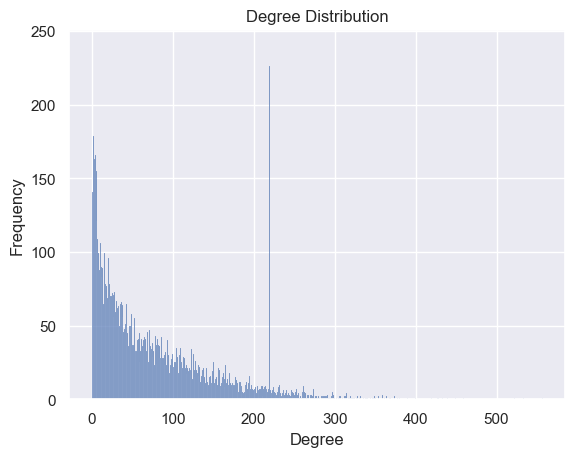

In [255]:
# get the degree of each node
degrees = [G.degree(node) for node in G.nodes()]
sns.set_theme()
# plot the degree distribution as a histogram
sns.histplot(degrees, bins=range(max(degrees)+2))
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()